In [1]:
import torch
ckpt_path = "/home/roborobo/Downloads/See-you-need-to-see/deploy/ckpt/vqa/model_full_text_loss_0.35.bin"
ckpt = torch.load(ckpt_path, map_location="cpu")
print(ckpt.keys())

odict_keys(['mask_decoder.pe_layer.positional_encoding_gaussian_matrix', 'discriminator.pe_layer.positional_encoding_gaussian_matrix', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.q_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.q_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.v_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.v_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.q_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.q_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.v_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.v_proj.lora_B.de

In [2]:
from deploy import load
model = load(ckpt_path, type="lisa", low_gpu_memory = True)


2024-05-14 19:44:10.655088: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 19:44:11.180152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/home/roborobo/anaconda3/lib/python3.10/site-packages/transformers/models/llava/configuration_llava.py:103: FutureWarning: The `vocab_size` argument is deprecated and will be removed in v4.42, since it can be inferred from the `text_config`. Passing this argument has no effect
  warnings.warn(
You are attempting to use Flash Attention 2.0 with a model not initialized on GPU. Make sure to move the model to GPU after initializing it on CPU with

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

trainable params: 4,194,304 || all params: 7,067,621,376 || trainable%: 0.05934534091261427
odict_keys(['mask_decoder.pe_layer.positional_encoding_gaussian_matrix', 'discriminator.pe_layer.positional_encoding_gaussian_matrix', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.q_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.q_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.v_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.0.self_attn.v_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.q_proj.lora_A.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.q_proj.lora_B.default.weight', 'prompt_encoder.model.base_model.model.language_model.model.layers.1.self_attn.v_proj.lora_A.default.weight', 'pr

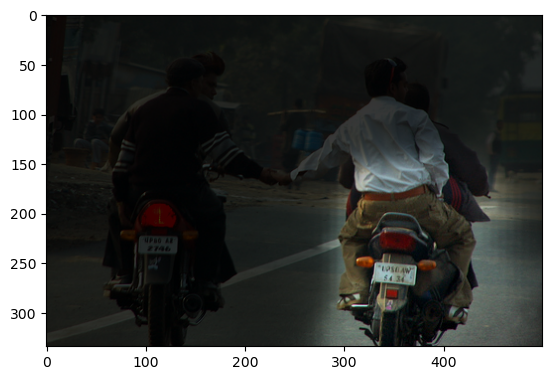

In [7]:
from PIL import Image

image = Image.open("/home/roborobo/Downloads/See-you-need-to-see/Test-VQAv2/val2014_subset/COCO_val2014_000000148526.jpg")
instruction = "which motocycle is not braking?"

result = model.forward_batch([image], [instruction], threshold=0.5, blur_kernel_size = 201, dilate_kernel_size =7, min_reserved_ratio=0.2, fill_color=(0,0,0))
from matplotlib import pyplot as plt
import numpy as np
plt.imshow((result['highlight_image'][0]).astype(np.uint8))

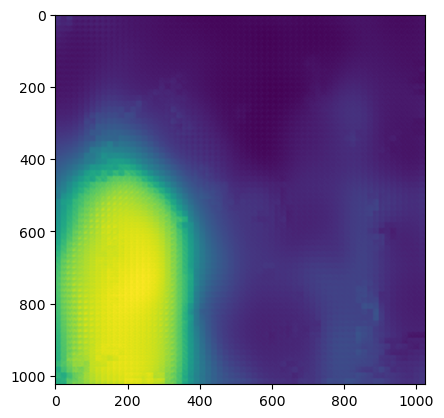

In [11]:
plt.imshow((result['soft'][0][0].cpu()))

In [137]:
import json
import tqdm
import os
metas = open("/home/roborobo/Downloads/See-you-need-to-see/V*/vstar/relative_position/rel.jsonl", "r").readlines()
for meta in tqdm.tqdm(metas):
    meta = json.loads(meta)
    image = Image.open(os.path.join("/home/roborobo/Downloads/See-you-need-to-see/V*/vstar/relative_position/", meta['image']))
    instruction = meta['question']

    result = model(image, instruction, threshold=0.5, dilate_kernel_size =201)
    from matplotlib import pyplot as plt
    import numpy as np
    plt.imsave(os.path.join("/home/roborobo/Downloads/See-you-need-to-see/V*/model1-v*/relative_position", meta['image']),result['cropped_highlight_img'].astype(np.uint8))

100%|██████████| 76/76 [01:30<00:00,  1.19s/it]


In [ ]:
from transformers import LlavaForConditionalGeneration, LlavaProcessor